<a href="https://colab.research.google.com/github/Arjun-08/Image-classification-model-that-can-classify-the-images-into-the-3-classes-/blob/main/DAH-covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, ConfusionMatrixDisplay
import seaborn as sns
from keras.preprocessing import image
from keras.models import load_model
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Dense,Flatten,Dropout,BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir("/content/drive/MyDrive/Covid19-dataset/")


['train', 'test']

In [ ]:
mypath="/content/drive/MyDrive/Covid19-dataset/train"
mypath_train="/content/drive/MyDrive/Covid19-dataset/train"
mypath_test="/content/drive/MyDrive/Covid19-dataset/test"
labels=[]
for i in os.listdir(mypath_train):
    labels.append(i)
no_labels=len(labels)
print("No of labels : ",no_labels)
print("Labels : ",labels)

No of labels :  2
Labels :  ['Normal', 'Abnormal']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train=ImageDataGenerator(rescale=1./255.,validation_split=0.2)
datagen_test=ImageDataGenerator(rescale=1./255.)

In [ ]:
SIZE=(150,150)
train_it=datagen_train.flow_from_directory(batch_size=32,
                                            directory=mypath_train,
                                            shuffle=True,
                                            classes=labels,
                                            target_size=SIZE,
                                            subset="training",
                                            class_mode='categorical')
valid_it=datagen_train.flow_from_directory(batch_size=32,
                                            directory=mypath_train,
                                            shuffle=True,
                                            classes=labels,
                                            subset="validation",
                                            target_size=SIZE,
                                            class_mode='categorical')
test_it=datagen_train.flow_from_directory(batch_size=1,
                                            directory=mypath_test,
                                            shuffle=False,
                                            classes=labels,
                                            target_size=SIZE,
                                            class_mode='categorical')

Found 201 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
hist=model.fit(train_it,epochs=5,validation_data=valid_it)

Epoch 1/5
7/7 [==============================] - 45s 7s/step - loss: 0.5990 - accuracy: 0.6866 - val_loss: 0.5287 - val_accuracy: 0.7200
Epoch 2/5
7/7 [==============================] - 5s 778ms/step - loss: 0.3905 - accuracy: 0.8010 - val_loss: 0.4091 - val_accuracy: 0.7200
Epoch 3/5
7/7 [==============================] - 6s 911ms/step - loss: 0.2562 - accuracy: 0.8607 - val_loss: 0.2011 - val_accuracy: 0.9600
Epoch 4/5
7/7 [==============================] - 6s 925ms/step - loss: 0.2041 - accuracy: 0.9204 - val_loss: 0.1811 - val_accuracy: 0.9600
Epoch 5/5
7/7 [==============================] - 5s 785ms/step - loss: 0.1191 - accuracy: 0.9652 - val_loss: 0.1549 - val_accuracy: 0.9000


In [ ]:
train_data_dir = '/content/drive/MyDrive/Covid19-dataset/train'
test_data_dir = '/content/drive/MyDrive/Covid19-dataset/test'

In [ ]:
image_width, image_height = 150, 150  # image dimensions

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='binary',  # binary classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='binary',  # binary classification
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='binary'  # binary classification
)

Found 201 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [ ]:
dot_img_file = '/tmp/model_1.png'
diagram=tf.keras.utils.plot_model(model1, to_file=dot_img_file, show_shapes=True)

model1 = Sequential()
model1.add(Conv2D(3|2, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

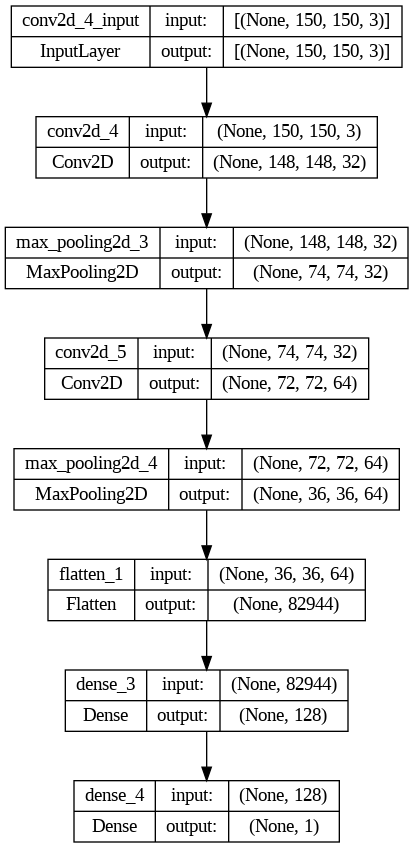

In [ ]:
diagram

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
model1.fit(train_generator, steps_per_epoch=train_generator.samples // train_generator.batch_size,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples // validation_generator.batch_size,
          epochs=10)

Epoch 1/10
6/6 [==============================] - 9s 1s/step - loss: 1.8792 - accuracy: 0.5858 - val_loss: 1.5316 - val_accuracy: 0.6875
Epoch 2/10
6/6 [==============================] - 5s 851ms/step - loss: 1.0163 - accuracy: 0.7337 - val_loss: 0.2996 - val_accuracy: 0.9688
Epoch 3/10
6/6 [==============================] - 6s 978ms/step - loss: 0.3839 - accuracy: 0.8542 - val_loss: 0.3728 - val_accuracy: 0.8125
Epoch 4/10
6/6 [==============================] - 5s 885ms/step - loss: 0.2568 - accuracy: 0.8958 - val_loss: 0.2525 - val_accuracy: 0.9375
Epoch 5/10
6/6 [==============================] - 6s 1s/step - loss: 0.1416 - accuracy: 0.9882 - val_loss: 0.1929 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 5s 976ms/step - loss: 0.1062 - accuracy: 0.9645 - val_loss: 0.1232 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 5s 956ms/step - loss: 0.0545 - accuracy: 1.0000 - val_loss: 0.1678 - val_accuracy: 0.9062
Epoch 8/10
6/6 [==========

In [ ]:
# Evaluate the model
loss, accuracy = model1.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {accuracy * 100:.2f}%')

2/2 [==============================] - 14s 14s/step - loss: 0.1502 - accuracy: 0.9219
Test accuracy: 92.19%


In [ ]:
dot_img_file = '/tmp/model_1.png'
diagram=tf.keras.utils.plot_model(model2, to_file=dot_img_file, show_shapes=True)

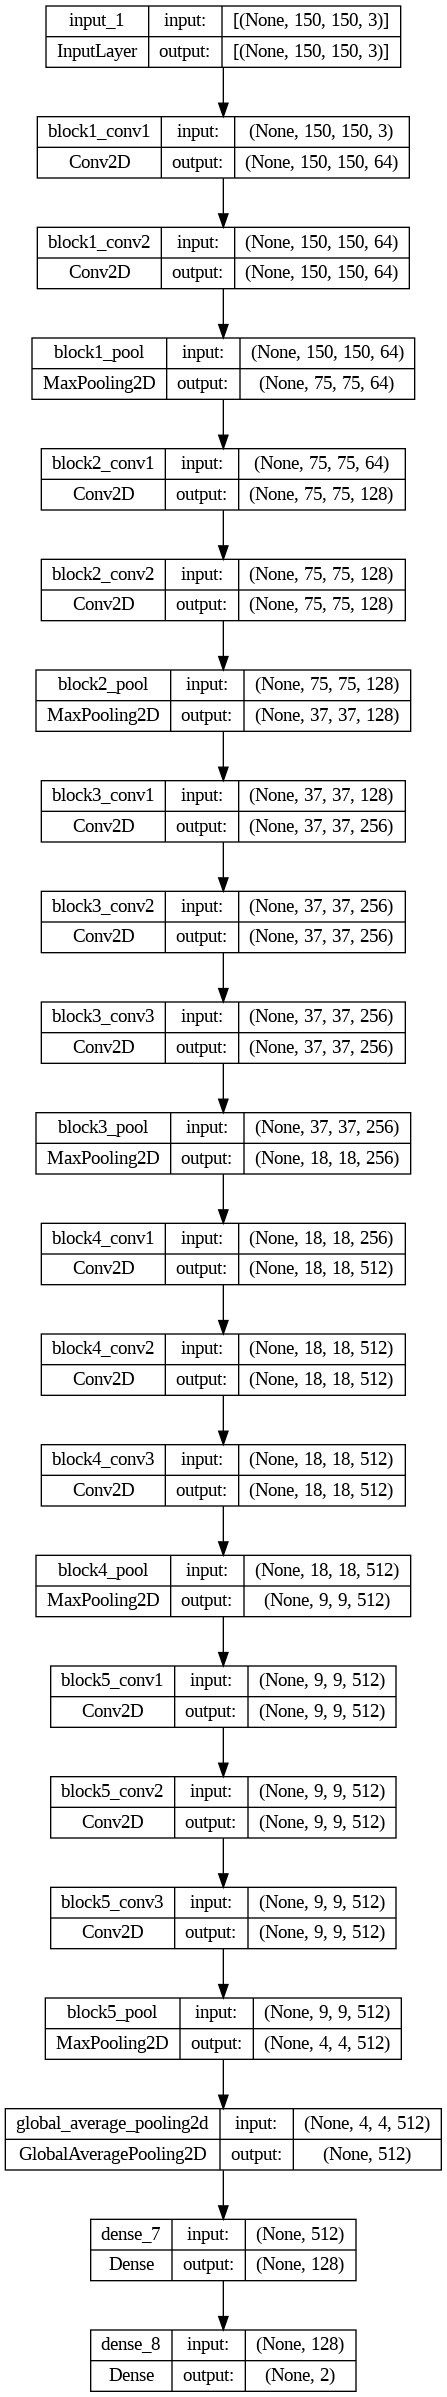

In [ ]:
diagram

In [ ]:
#prediction of model1
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values to be between 0 and 1
    return img_array

new_image_path = '/content/drive/MyDrive/Covid19-dataset/test/Normal/0109.jpeg'

new_image = load_and_preprocess_image(new_image_path)

# Make a prediction
prediction = model1.predict(new_image)

# Interpret the prediction
if prediction < 0.5:
    print('Prediction: Normal')
else:
    print('Prediction: Abnormal')


1/1 [==============================] - 0s 208ms/step
Prediction: Abnormal


In [ ]:

# Data generators for COVID and PNEUMONIA classification
train_abnormal_data_dir = '/content/drive/MyDrive/Covid19-dataset/train'
test_abnormal_data_dir = '/content/drive/MyDrive/Covid19-dataset/test'
image_width, image_height = 150, 150

train_abnormal_datagen = ImageDataGenerator(rescale=1./255)
test_abnormal_datagen = ImageDataGenerator(rescale=1./255)

train_abnormal_generator = train_abnormal_datagen.flow_from_directory(
    train_abnormal_data_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',  # categorical classification (COVID and PNEUMONIA)
    shuffle=True
)

test_abnormal_generator = test_abnormal_datagen.flow_from_directory(
    test_abnormal_data_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical'  # categorical classification (COVID and PNEUMONIA)

)




Found 251 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [ ]:
y_test= test_abnormal_generator.classes


In [ ]:
# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Add custom layers for COVID and PNEUMONIA classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Dense layer with 128 units and ReLU activation
predictions = Dense(2, activation='softmax')(x)  # Output layer with 2 units for COVID and PNEUMONIA with softmax activation


58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
# Combine the base model and custom layers to create the new model
model2 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the layers of the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model2.fit(train_abnormal_generator, epochs=10, validation_data=test_abnormal_generator)

Epoch 1/10
8/8 [==============================] - 12s 1s/step - loss: 0.5227 - accuracy: 0.7291 - val_loss: 0.5322 - val_accuracy: 0.6970
Epoch 2/10
8/8 [==============================] - 6s 740ms/step - loss: 0.4167 - accuracy: 0.7888 - val_loss: 0.4316 - val_accuracy: 0.8939
Epoch 3/10
8/8 [==============================] - 7s 954ms/step - loss: 0.3501 - accuracy: 0.8327 - val_loss: 0.4050 - val_accuracy: 0.7576
Epoch 4/10
8/8 [==============================] - 7s 892ms/step - loss: 0.2942 - accuracy: 0.9004 - val_loss: 0.3522 - val_accuracy: 0.8939
Epoch 5/10
8/8 [==============================] - 7s 754ms/step - loss: 0.2563 - accuracy: 0.9243 - val_loss: 0.3676 - val_accuracy: 0.8030
Epoch 6/10
8/8 [==============================] - 7s 921ms/step - loss: 0.2339 - accuracy: 0.9243 - val_loss: 0.3164 - val_accuracy: 0.8939
Epoch 7/10
8/8 [==============================] - 7s 861ms/step - loss: 0.2174 - accuracy: 0.9363 - val_loss: 0.3155 - val_accuracy: 0.8788
Epoch 8/10
8/8 [======

In [ ]:
# Evaluate the model
loss, accuracy = model2.evaluate(test_abnormal_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')

3/3 [==============================] - 1s 202ms/step - loss: 0.2836 - accuracy: 0.8788
Test accuracy: 87.88%


In [ ]:
# making prediction
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

new_abnormal_image_path = '/content/drive/MyDrive/Covid19-dataset/test/Abnormal/Covid/0106.jpeg'

new_abnormal_image = load_and_preprocess_image(new_abnormal_image_path)

predictions = model2.predict(new_abnormal_image)


class_labels = ['COVID', 'PNEUMONIA']
predicted_class_idx = np.argmax(predictions)
predicted_class = class_labels[predicted_class_idx]

print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 1s 624ms/step
Predicted class: COVID


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model1.predict(test_abnormal_generator)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

3/3 [==============================] - 1s 188ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        46
           1       0.00      0.00      0.00        20

    accuracy                           0.70        66
   macro avg       0.35      0.50      0.41        66
weighted avg       0.49      0.70      0.57        66



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model2.predict(test_abnormal_generator)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

3/3 [==============================] - 1s 240ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.85      0.80        46
           1       0.50      0.35      0.41        20

    accuracy                           0.70        66
   macro avg       0.62      0.60      0.60        66
weighted avg       0.67      0.70      0.68        66

